In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from typing import List

# Stochastic integration

In [2]:
# Constants
T = 2
M = 1000

### Exercise 1

#### 1.a

In [3]:
def generate_brownian_motion(n: int) -> np.array:
    dt = T/n
    
    # Generate increments of Brownian motion
    w = np.random.normal(0, np.sqrt(dt), (M,n))
    w = w.cumsum(axis = 1)
    
    # Adding start at 0
    w = np.concatenate([np.zeros((M,1)), w], axis = 1)

    return w

def compute_random_variables(n: int):
    # Generating Brownian motions
    w = generate_brownian_motion(n)
    
    # Computing integrals
    In = np.sum(np.diff(w, axis = 1) * w[:,:-1], axis = 1)
    Jn = np.sum(np.diff(w, axis = 1) * w[:,1:], axis = 1)
    Kn = np.sum(((w + np.roll(w,1,axis = 1))[:,1:]/2) * np.diff(w, axis = 1), axis = 1)
    
    # Generating random variables
    rv_I = (1/2) * w[:,-1] * w[:,-1] - In
    rv_J = (1/2) * w[:,-1] * w[:,-1] - Jn
    rv_K = (1/2) * w[:,-1] * w[:,-1] - Kn
    
    return rv_I, rv_J, rv_K

In [4]:
rv_I, rv_J, rv_K = compute_random_variables(15)

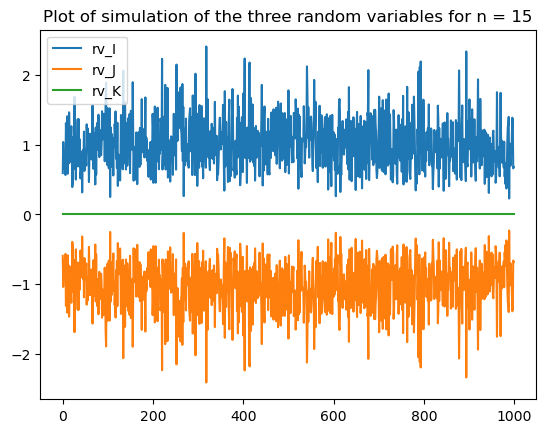

In [5]:
# Plot for n = 15 for visualization porpuses
x = np.arange(M)

plt.title('Plot of simulation of the three random variables for n = 15')
plt.plot(x, rv_I, label = 'rv_I')
plt.plot(x, rv_J, label = 'rv_J')
plt.plot(x, rv_K, label = 'rv_K')

plt.legend()

plt.show()

We observe that we have two random variables seemly centered at $-1$ and $1$ with some oscillations, and a third one that is equal to zero.

#### 1.b

In [6]:
print(f"Mean for random variable with In: {np.mean(rv_I)}")
print(f"Mean for random variable with Jn: {np.mean(rv_J)}")
print(f"Mean for random variable with Kn: {np.mean(rv_K)}")

Mean for random variable with In: 1.014190663497533
Mean for random variable with Jn: -1.0141906634975333
Mean for random variable with Kn: 8.449056240072712e-19


Comment: We can observe that only the third random variable is equal to zero, hence $K_{n} = \frac{1}{2}W_{T}$. The other two were either equal to $T/2 = 1$ or minus that. The reason is very simple:

$$
\sum_{i = 1}^{n}W_{t^{n}_{i-1}}\Delta W_{t_{i}^{n}} = - \sum_{i = 1}^{n}(W_{T^{n}_{i}} - W_{T^{n}_{i-1}})^{2} + \sum_{i=1}^{n}(W_{T^{n}_{i}}^{2} - W_{T^{n}_{i-1}}^{2})
$$

$$
2\sum_{i = 1}^{n}W_{t^{n}_{i-1}}\Delta W_{t_{i}^{n}} = W_{T}^{2} - \sum_{i=1}^{n}(W_{t^{n}_{i}} - W_{t^{n}_{i-1}})^{2}
$$

Donc:

$$
2\mathbb{E}[\sum_{i = 1}^{n}W_{t^{n}_{i-1}}\Delta W_{t_{i}^{n}}] = W_{T}^{2} - \sum_{i = 1}^{n} \mathbb{E}[(W_{t^{n}_{i}} - W_{t^{n}_{i-1}})^{2}]
$$

As $W_{t^{n}_{i}} - W_{t^{n}_{i-1}} \sim \mathcal{N}(0,\frac{T}{n})$:

$$
2\mathbb{E}[\sum_{i = 1}^{n}W_{t^{n}_{i-1}}\Delta W_{t_{i}^{n}}] = W_{T}^{2} - \sum_{i = 1}^{n} \frac{T}{n}
$$

$$
\mathbb{E}[\sum_{i = 1}^{n}W_{t^{n}_{i-1}}\Delta W_{t_{i}^{n}}] = \frac{1}{2}W_{T}^{2} - T
$$

Therefore:

$$
\mathbb{E}[\frac{1}{2}W_{T}^{2} - I_{n}] = T
$$

Which is indeed what we observe in the graph. Similar computations show that:

$$
\mathbb{E}[\frac{1}{2}W_{T}^{2} - J_{n}] = - T
$$

That comes from the change in sign in the left term of the first equation of the previous demonstration.

The random variable from $K_{n}$, is exactly $\frac{1}{2}W^{2}_{T}$:

$$
(W_{t^{n}_{i}} - W_{t^{n}_{i-1}}) (W_{t^{n}_{i}} + W_{t^{n}_{i-1}}) = W_{t^{n}_{i}}^{2} - W_{t^{n}_{i-1}}^{2} 
$$

Thus:

$$
\sum_{i=1}^{n}(W_{t^{n}_{i}} - W_{t^{n}_{i-1}}) (W_{t^{n}_{i}} + W_{t^{n}_{i-1}}) = W^{2}_{T} - W_{0}^{2} = W^{2}_{T} 
$$

Hence it is normal that we always obtain a value **equal** to zero.

This is a good example of showing that depending on how we attempt to discretize an stochastic integral we arrive at different results.

#### 1.c

Here we take an asymptotic confidence interval of 5%. Therefore:

$$
\Delta = \frac{1.96 \hat{\sigma}}{\sqrt{M}}
$$

Where $\hat\sigma$ is simply the empirical value of the standard deviation.

In [7]:
## Generating points

ns = np.arange(10,21)

sample_meanI = np.zeros(ns.shape[0])
sample_stdI = np.zeros(ns.shape[0])

sample_meanJ = np.zeros(ns.shape[0])
sample_stdJ = np.zeros(ns.shape[0])

sample_meanK = np.zeros(ns.shape[0])
sample_stdK = np.zeros(ns.shape[0])


for i, n in enumerate(ns):
    rv_I, rv_J, rv_K = compute_random_variables(n)
    
    sample_meanI[i] = np.mean(rv_I)
    sample_stdI[i] = np.std(rv_I)
    
    sample_meanJ[i] = np.mean(rv_J)
    sample_stdJ[i] = np.std(rv_J)
    
    sample_meanK[i] = np.mean(rv_K)
    sample_stdK[i] = np.std(rv_K)
    
sample_Iup = sample_stdI * 1.96 / np.sqrt(M) + sample_meanI
sample_Idown = - sample_stdI * 1.96 / np.sqrt(M) + sample_meanI

sample_Jup = sample_stdJ * 1.96 / np.sqrt(M) + sample_meanJ
sample_Jdown = - sample_stdJ * 1.96 / np.sqrt(M) + sample_meanJ

sample_Kup = sample_stdK * 1.96 / np.sqrt(M) + sample_meanK
sample_Kdown = - sample_stdK * 1.96 / np.sqrt(M) + sample_meanK

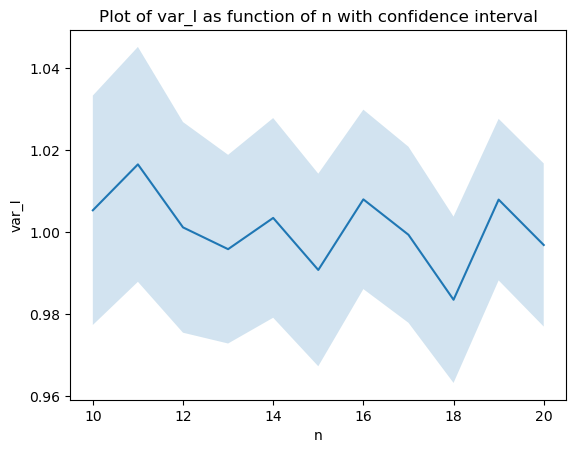

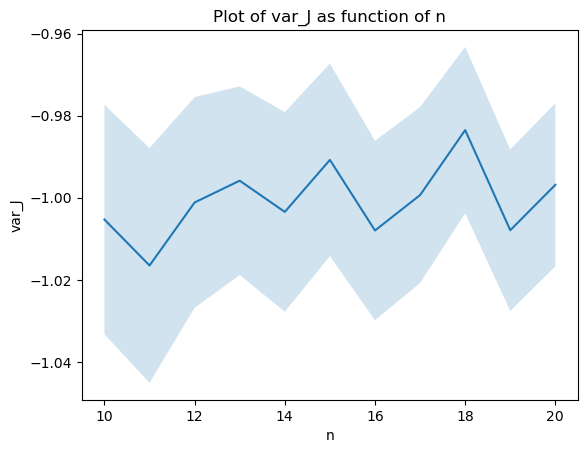

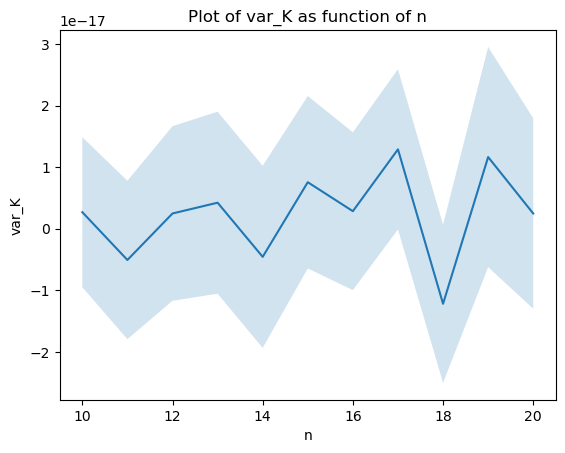

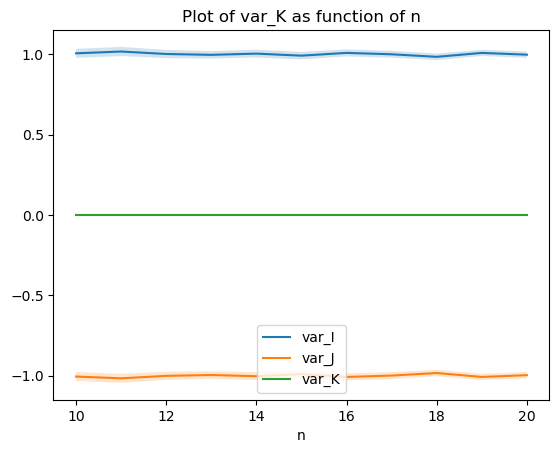

In [8]:
## Plotting curves independently with confidence intervals
plt.title('Plot of var_I as function of n with confidence interval')
plt.plot(ns, sample_meanI)
plt.fill_between(ns, sample_Idown, sample_Iup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_I')
plt.show()

plt.title('Plot of var_J as function of n')
plt.plot(ns, sample_meanJ)
plt.fill_between(ns, sample_Jdown, sample_Jup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_J')
plt.show()

plt.title('Plot of var_K as function of n')
plt.plot(ns, sample_meanK)
plt.fill_between(ns, sample_Kdown, sample_Kup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_K')
plt.show()

## Plotting curves together with confidence intervals
plt.title('Plot of var_I as function of n')
plt.plot(ns, sample_meanI, label = 'var_I')
plt.fill_between(ns, sample_Idown, sample_Iup, alpha = 0.2)
plt.xlabel('n')

plt.title('Plot of var_J as function of n')
plt.plot(ns, sample_meanJ, label = 'var_J')
plt.fill_between(ns, sample_Jdown, sample_Jup, alpha = 0.2)
plt.xlabel('n')

plt.title('Plot of var_K as function of n')
plt.plot(ns, sample_meanK, label = 'var_K')
plt.fill_between(ns, sample_Kdown, sample_Kup, alpha = 0.2)
plt.xlabel('n')

plt.legend()
plt.show()

We observe that the there is no significant change with the increase of the value of n.

### Exercise 2

In [9]:
def compute_random_variables2(n: int):
    # Generating Brownian motions
    w = generate_brownian_motion(n)
    
    ts = np.ones((M,1)) @ (np.arange(n+1) * (T/n)).reshape((1,n+1))
    # Computing integrals
    An = np.sum(np.e**(ts[:,:-1]) * np.diff(w, axis = 1), axis = 1)
    Bn = np.sum(np.e**(ts[:,1:]) * np.diff(w, axis = 1), axis = 1)
    Cn = np.sum(np.e**((ts + np.roll(ts,1,axis = 1))[:,1:]/2) * np.diff(w, axis = 1), axis = 1)
    
    # Generating random variables
    rv_I = 0 - An
    rv_J = 0 - Bn
    rv_K = 0 - Cn
    
    return rv_I, rv_J, rv_K

In [10]:
rv_A, rv_B, rv_C = compute_random_variables2(1000)

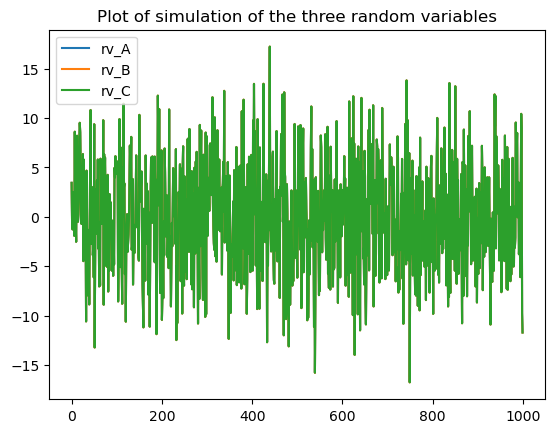

In [11]:
x = np.arange(M)

plt.title('Plot of simulation of the three random variables')
plt.plot(x, rv_A, label = 'rv_A')
plt.plot(x, rv_B, label = 'rv_B')
plt.plot(x, rv_C, label = 'rv_C')

plt.legend()

plt.show()

We see that they basically match.

In [12]:
print(f"Mean for random variable with In: {np.mean(rv_A)}")
print(f"Mean for random variable with Jn: {np.mean(rv_B)}")
print(f"Mean for random variable with Kn: {np.mean(rv_C)}")

Mean for random variable with In: -0.03697037941954648
Mean for random variable with Jn: -0.037044394168462946
Mean for random variable with Kn: -0.037007368290319045


And furthermore have almost the same mean that is close to zero.

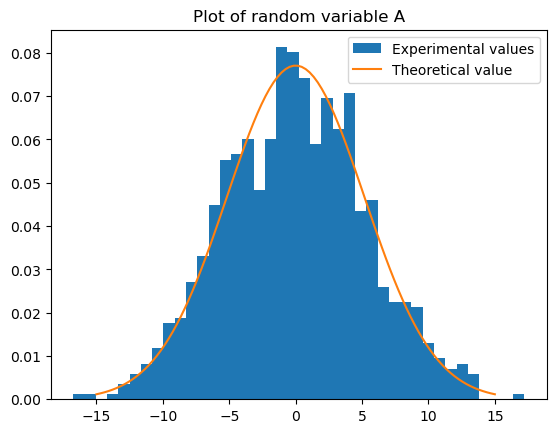

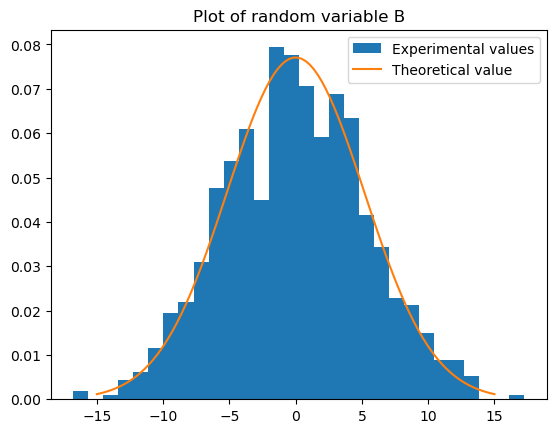

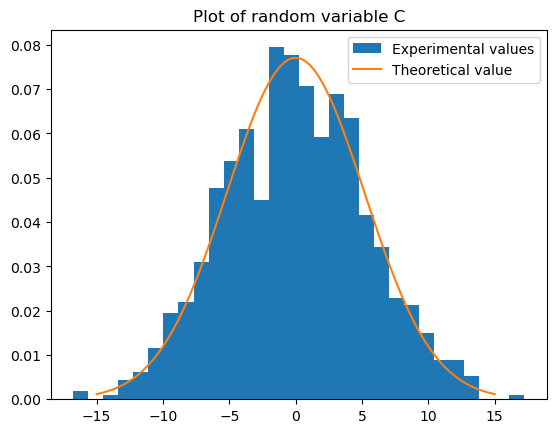

In [13]:
x = np.linspace(-15,15,100)
y = scipy.stats.norm(0, np.sqrt((1/2)*(np.e**(2*T) - 1))).pdf(x)

plt.title('Plot of random variable A')
plt.hist(rv_A, bins = 40, density=True, label = 'Experimental values')
plt.plot(x,y, label = 'Theoretical value')
plt.legend()
plt.show()

plt.title('Plot of random variable B')
plt.hist(rv_B, bins = 30, density=True, label = 'Experimental values')
plt.plot(x,y, label = 'Theoretical value')
plt.legend()
plt.show()

plt.title('Plot of random variable C')
plt.hist(rv_C, bins = 30, density=True, label = 'Experimental values')
plt.plot(x,y, label = 'Theoretical value')
plt.legend()
plt.show()

Comment:

This was the expected shape of observations from theory as they correspond to the following integral:

$$
X = \int_{0}^{T}e^{t}dW  \sim \mathcal{N}\left(0, \int_{0}^{T}e^{2s}ds\right) = \mathcal{N}\left(0, \frac{e^{2T}-1}{2}\right) 
$$

When supperposed the histogram plot with the plot of the gaussian distribution with the correct corresponding variance we retrieve that for the three random variables they fairly match.

We also remark that since there was no random component in the function we were integrating, the three random variables yield very similar results, different from what we observed in the previous question, where the whey we discretize the stochastic integral influenced the result.

In [14]:
## Generating points

ns = np.arange(10,21)

sample_meanA = np.zeros(ns.shape[0])
sample_stdA = np.zeros(ns.shape[0])

sample_meanB = np.zeros(ns.shape[0])
sample_stdB = np.zeros(ns.shape[0])

sample_meanC = np.zeros(ns.shape[0])
sample_stdC = np.zeros(ns.shape[0])


for i, n in enumerate(ns):
    rv_A, rv_B, rv_C = compute_random_variables2(n)
    
    sample_meanA[i] = np.mean(rv_A)
    sample_stdA[i] = np.std(rv_A)
    
    sample_meanB[i] = np.mean(rv_B)
    sample_stdB[i] = np.std(rv_B)
    
    sample_meanC[i] = np.mean(rv_C)
    sample_stdC[i] = np.std(rv_C)
    
sample_Aup = sample_stdA * 1.96 / np.sqrt(M) + sample_meanA
sample_Adown = - sample_stdA * 1.96 / np.sqrt(M) + sample_meanA

sample_Bup = sample_stdB * 1.96 / np.sqrt(M) + sample_meanB
sample_Bdown = - sample_stdB * 1.96 / np.sqrt(M) + sample_meanB

sample_Cup = sample_stdC * 1.96 / np.sqrt(M) + sample_meanC
sample_Cdown = - sample_stdC * 1.96 / np.sqrt(M) + sample_meanC

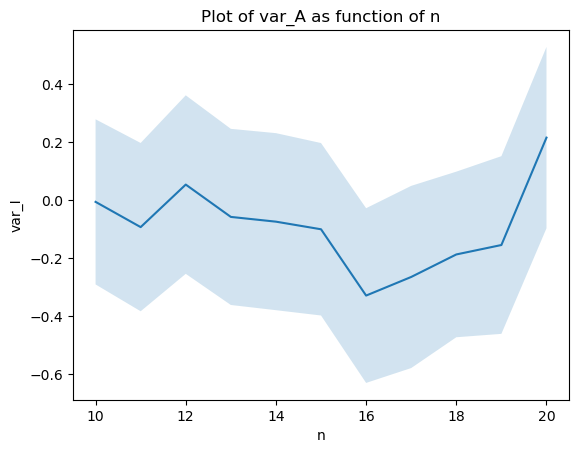

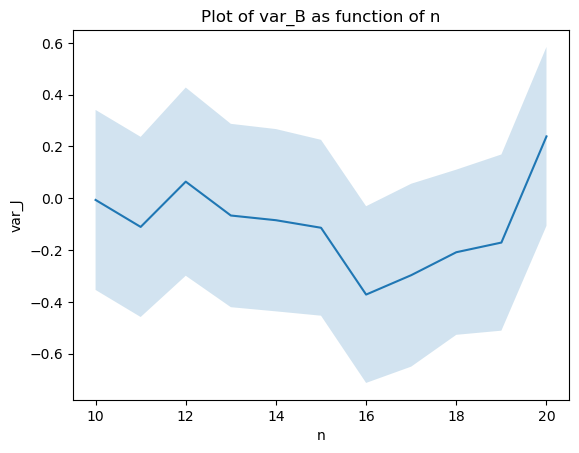

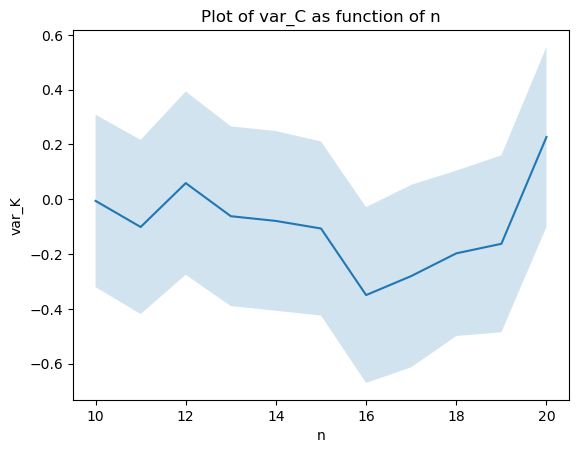

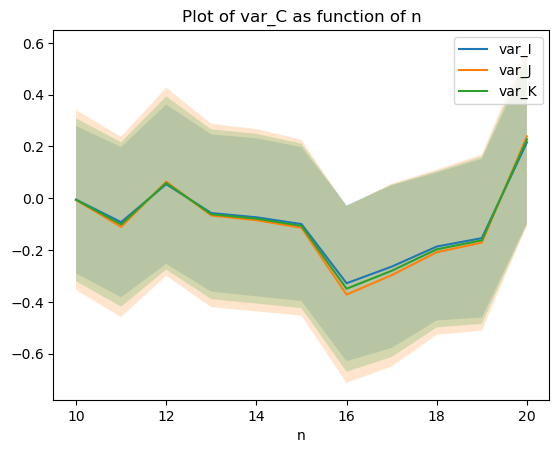

In [15]:
## Plotting curves independently with confidence intervals
plt.title('Plot of var_A as function of n')
plt.plot(ns, sample_meanA)
plt.fill_between(ns, sample_Adown, sample_Aup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_I')
plt.show()

plt.title('Plot of var_B as function of n')
plt.plot(ns, sample_meanB)
plt.fill_between(ns, sample_Bdown, sample_Bup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_J')
plt.show()

plt.title('Plot of var_C as function of n')
plt.plot(ns, sample_meanC)
plt.fill_between(ns, sample_Cdown, sample_Cup, alpha = 0.2)
plt.xlabel('n')
plt.ylabel('var_K')
plt.show()

## Plotting curves together with confidence intervals
plt.title('Plot of var_A as function of n')
plt.plot(ns, sample_meanA, label = 'var_I')
plt.fill_between(ns, sample_Adown, sample_Aup, alpha = 0.2)
plt.xlabel('n')

plt.title('Plot of var_B as function of n')
plt.plot(ns, sample_meanB, label = 'var_J')
plt.fill_between(ns, sample_Bdown, sample_Bup, alpha = 0.2)
plt.xlabel('n')

plt.title('Plot of var_C as function of n')
plt.plot(ns, sample_meanC, label = 'var_K')
plt.fill_between(ns, sample_Cdown, sample_Cup, alpha = 0.2)
plt.xlabel('n')

plt.legend()
plt.show()

We observe that the there is no significant change with the increase of the value of n and the three random variables are difficult to distinguish as they have very similar values.

### Exercise 3

### 3.a

In [16]:
def compute_random_variables3(n: int):
    # Generating Brownian motions
    w = generate_brownian_motion(n)
    
    An = np.sin(w[:,-1]) + (1/(2*n)) * np.sum(np.sin(w[:,:-1]), axis = 1)
    
    return An

In [17]:
An = compute_random_variables3(15)

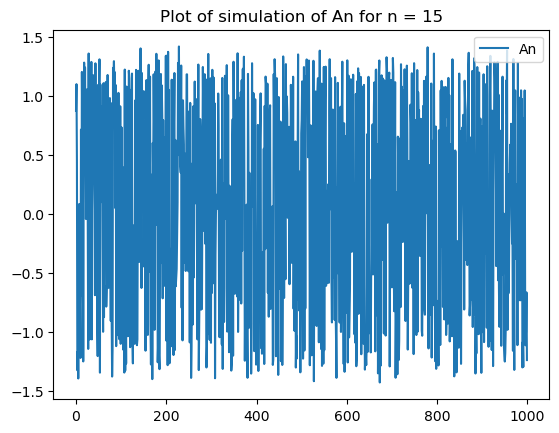

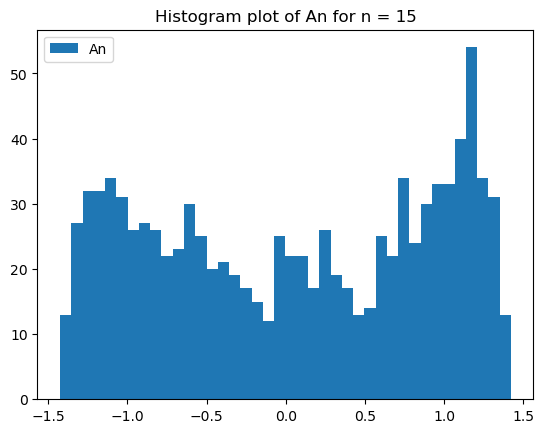

In [18]:
x = np.arange(M)

plt.title('Plot of simulation of An for n = 15')
plt.plot(x, An, label = 'An')
plt.legend()
plt.show()

plt.title('Histogram plot of An for n = 15')
plt.hist(An, label = 'An', bins = 40)
plt.legend()
plt.show()

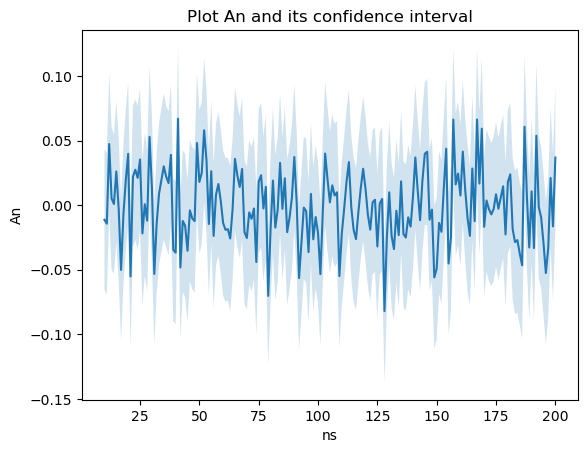

In [19]:
ns = np.arange(10,201)

sample_mean = np.zeros(ns.shape[0])
sample_std = np.zeros(ns.shape[0])

for i, n in enumerate(ns):
    An = compute_random_variables3(n)
    sample_mean[i] = np.mean(An)
    sample_std[i] = np.std(An)
    
Anup = 1.96 * sample_std / np.sqrt(M) + sample_mean
Andown = - 1.96 * sample_std / np.sqrt(M) + sample_mean

plt.plot(ns, sample_mean, label = 'An')
plt.fill_between(ns, Andown, Anup, alpha = 0.2, label = 'Confidence interval')
plt.title("Plot An and its confidence interval")
plt.ylabel('An')
plt.xlabel('ns')
plt.show()

### 3.b

As expected, we retreive values that are centered at zero as we are discretizing the following integral:

$$
\int_{0}^{T} \sin(W_{t}) dt
$$

We observe that since $x\mapsto \sin(x)$ is an odd function and $W$ has an even distribution:

$$
\mathbb{E}[\sin(W_{t})] = 0
$$

Therefore, as we are dealing with a continous function in a bounded interval:

$$
\mathbb{E}\left[\int_{0}^{T}\sin(W_{t}dt)\right] = \int_{0}^{T}\mathbb{E}[\sin(W_{t})]dt = 0
$$

Justifying the values being centered at zero.

Furthermore we also observe that the deviation around zero remains fairly constant no matter the number $n$ of discrete steps we take.